In [82]:
import pandas as pd
import matplotlib.pyplot as plt


Our data is a series of BTC-USD trades made on GDAX. The features are described below:

 feature | description 
 ------- | ------------
 price   | the exchange rate for the trade - i.e., USD per Bitcoin
 size    | the size of the trade
 side    | whether the order was executed by a 'buyer' or 'seller'
 time    | the time at which GDAX notified us of the trade 


The first thing we notice is that at a given instant in time, there are multiple simultaneous orders which come through. Our first task will be to clean up the data a bit and solove this issue.

In [76]:
df = pd.read_csv('data/data2.csv', index_col='sequence')
df['time'] = pd.to_datetime(df['time']).astype(int)
df.head()

,price,size,side,time
sequence,,,,
4724622867,13021.43,0.001190,sell,1514708107700000000
4724622869,13021.43,0.000346,sell,1514708107700000000
4724622871,13021.52,0.001190,sell,1514708107700000000
4724622873,13021.53,0.001958,sell,1514708107700000000
4724622875,13021.54,0.002645,sell,1514708107700000000


In [72]:
grouped = df.groupby('time')

def normalize_price(g):
    vol = g['size'].sum()
    price = (g['size'] * g.price).sum() / vol
    return pd.Series([vol, price], ['size', 'price'])

agg_df = grouped.apply(normalize_price).reset_index()

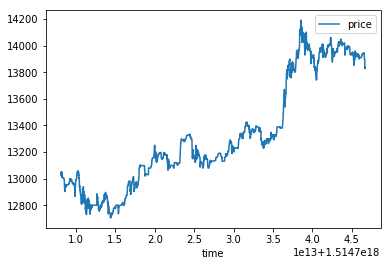

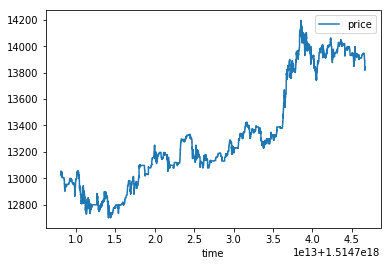

In [73]:
agg_df.plot(x='time', y='price')
df.plot(x='time', y='price')